Name: Mahad Siddique

Emai mahadsiddique07@gmail.comibraries

## AI 2024 Online Summer Internship
# Make Your Place in top 20% AI Engineers of the World
# Assignment 3 :
# Emotional Prediction Model
# Step 1: Import Libraries

In [20]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Sample Data

In [23]:
data = pd.read_csv('emotion_prediction_dataset.csv')

print("\n\nEmotional Prediction Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(f'Sample data count = {len(data)}\n')
print(data.head())
print(data.tail())




Emotional Prediction Data:

Sample data count = 100

                                               Tweet Emotion
0             False alarm // matoma &amp; Becky hill   anger
1  I'm tired of everybody telling me to chill out...   anger
2  Im so serious about putting words in my mouth ...   anger
3  Can someone make me a priority list of which t...   anger
4  @TeaPartyOrg Hes right when the Civil war star...   anger
                                                Tweet Emotion
95  Riggs dumb ass hell lolol #hilarious #LethalWe...   trust
96                        American Schools are lively   trust
97  Accept the challenges so that you can feel the...   trust
98  Have any of you ever stayed in hostels oversea...   trust
99  @ProSyndicate thanks for replying, I'm ironing...   trust


# Step 2.1: View Columns In Dataset


In [26]:
data.columns


Index(['Tweet', 'Emotion'], dtype='object')

# Step 2.2: Keeping Required Column In Dataset


In [37]:
data = data [['Tweet', 'Emotion']]

print("\n\nEmotional Prediction Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())
print(data.tail())



Emotional Prediction Data:

                                               Tweet Emotion
0             False alarm // matoma &amp; Becky hill   anger
1  I'm tired of everybody telling me to chill out...   anger
2  Im so serious about putting words in my mouth ...   anger
3  Can someone make me a priority list of which t...   anger
4  @TeaPartyOrg Hes right when the Civil war star...   anger
                                                Tweet Emotion
95  Riggs dumb ass hell lolol #hilarious #LethalWe...   trust
96                        American Schools are lively   trust
97  Accept the challenges so that you can feel the...   trust
98  Have any of you ever stayed in hostels oversea...   trust
99  @ProSyndicate thanks for replying, I'm ironing...   trust


# Step 3: Understand and Pre-process Sample Data


# Step 3.1: Download and set stopwords


In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Step 3.2: Define a function to clean the text


In [46]:
def clean_text(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Function 1: Remove Symbols and Numbers



In [52]:
def remove_symbols_numbers(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Function 2: Convert Text to Lowercase



In [66]:
def to_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    return text

# Function 3: Remove Stopwords



In [68]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Step 3.3: Load the data


In [73]:
data = pd.read_csv('emotion_prediction_dataset.csv')


In [75]:
data


,Tweet,Emotion
0,False alarm // matoma &amp; Becky hill,anger
1,I'm tired of everybody telling me to chill out...,anger
2,Im so serious about putting words in my mouth ...,anger
3,Can someone make me a priority list of which t...,anger
4,@TeaPartyOrg Hes right when the Civil war star...,anger
5,From harboring Osama bin Laden to its relation...,anger
6,tomorrow will be the last episode of despair a...,anticipation
7,PASTOR - 15 FEET away from shooting victim dur...,anticipation
8,me: are you guys dating yet #trans #nervous #b...,anticipation
9,Collects all the times when Minerva would chew...,anticipation


# Step 3.4: Drop rows with NaN values in the text column


In [83]:
print(len(data))


100


In [85]:
data = data.dropna(subset=['Emotion'])


In [87]:
print(len(data))


100


# Step 3.5: Apply Data Cleaning


In [91]:
data['Emotion']


0            anger
1            anger
2            anger
3            anger
4            anger
5            anger
6     anticipation
7     anticipation
8     anticipation
9     anticipation
10    anticipation
11    anticipation
12    anticipation
13    anticipation
14         disgust
15         disgust
16         disgust
17         disgust
18         disgust
19         disgust
20         disgust
21         disgust
22         disgust
23         disgust
24         disgust
25            fear
26            fear
27            fear
28            fear
29            fear
30            fear
31            fear
32            fear
33            fear
34            fear
35            fear
36            fear
37            fear
38             joy
39             joy
40             joy
41             joy
42             joy
43             joy
44             joy
45             joy
46             joy
47             joy
48             joy
49             joy
50             joy
51            love
52          

In [93]:
data['Tweet']


0                False alarm // matoma &amp; Becky hill
1     I'm tired of everybody telling me to chill out...
2     Im so serious about putting words in my mouth ...
3     Can someone make me a priority list of which t...
4     @TeaPartyOrg Hes right when the Civil war star...
5     From harboring Osama bin Laden to its relation...
6     tomorrow will be the last episode of despair a...
7     PASTOR - 15 FEET away from shooting victim dur...
8     me: are you guys dating yet #trans #nervous #b...
9     Collects all the times when Minerva would chew...
10    10 page script due Friday for class. Who said ...
11    Omg I actually thought she was going to jump. ...
12    You don't know what to expect by Brendon's vid...
13    @LaneWoolery @FFKazman experience all plays a ...
14    @Montel_Williams If this ban goes through, it ...
15    @PatBlanchfield so you mean “like Uber but for...
16                                        This is awful
17    @thehill George H. Establishment is unhapp

In [95]:
data['Tweet'] = data['Tweet'].apply(remove_symbols_numbers)


In [97]:
data['Tweet']


0                    False alarm  matoma amp Becky hill
1     Im tired of everybody telling me to chill out ...
2     Im so serious about putting words in my mouth ...
3     Can someone make me a priority list of which t...
4     TeaPartyOrg Hes right when the Civil war start...
5     From harboring Osama bin Laden to its relation...
6     tomorrow will be the last episode of despair a...
7     PASTOR   FEET away from shooting victim during...
8     me are you guys dating yet trans nervous blowj...
9     Collects all the times when Minerva would chew...
10     page script due Friday for class Who said I c...
11    Omg I actually thought she was going to jump  ...
12    You dont know what to expect by Brendons video...
13    LaneWoolery FFKazman experience all plays a ro...
14    MontelWilliams If this ban goes through it wil...
15    PatBlanchfield so you mean like Uber but for d...
16                                        This is awful
17    thehill George H Establishment is unhappy 

**Apply function to convert to lower case**



In [106]:
data['Tweet'] = data['Tweet'].apply(to_lowercase)


In [108]:
data['Tweet']


0                    false alarm  matoma amp becky hill
1     im tired of everybody telling me to chill out ...
2     im so serious about putting words in my mouth ...
3     can someone make me a priority list of which t...
4     teapartyorg hes right when the civil war start...
5     from harboring osama bin laden to its relation...
6     tomorrow will be the last episode of despair a...
7     pastor   feet away from shooting victim during...
8     me are you guys dating yet trans nervous blowj...
9     collects all the times when minerva would chew...
10     page script due friday for class who said i c...
11    omg i actually thought she was going to jump  ...
12    you dont know what to expect by brendons video...
13    lanewoolery ffkazman experience all plays a ro...
14    montelwilliams if this ban goes through it wil...
15    patblanchfield so you mean like uber but for d...
16                                        this is awful
17    thehill george h establishment is unhappy 

**Apply function to remove stop words**



In [111]:
data['Tweet'] = data['Tweet'].apply(remove_stopwords)


In [113]:
data['Tweet']

0                     false alarm matoma amp becky hill
1     im tired everybody telling chill everythings o...
2     im serious putting words mouth bitch dont add ...
3     someone make priority list things outraged ord...
4     teapartyorg hes right civil war starts wall wa...
5     harboring osama bin laden relationship haqqani...
6     tomorrow last episode despair arc much shit go...
7     pastor feet away shooting victim protest says ...
8     guys dating yet trans nervous blowjobs tfb dat...
9     collects times minerva would chew cape begins ...
10    page script due friday class said could mfa th...
11    omg actually thought going jump southpark sout...
12    dont know expect brendons video lmao la devote...
13    lanewoolery ffkazman experience plays role edu...
14    montelwilliams ban goes harm many people disab...
15    patblanchfield mean like uber despair someone ...
16                                                awful
17    thehill george h establishment unhappy tru

**Following function contains the all three tasks for the sake of simplicity we dividied it in three parts.**



In [116]:
# Clean the 'tweet' column
data['Tweet'] = data['Tweet'].apply(clean_text)

# Step 3.6: Data After Processing


In [122]:
print("\n\nEmotional prediction Data After Preprocessing:")
print("=================================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data.head())
print(data.tail())



Emotional prediction Data After Preprocessing:

                                               Tweet Emotion
0                  false alarm matoma amp becky hill   anger
1  im tired everybody telling chill everythings o...   anger
2  im serious putting words mouth bitch dont add ...   anger
3  someone make priority list things outraged ord...   anger
4  teapartyorg hes right civil war starts wall wa...   anger
                                                Tweet Emotion
95   riggs dumb ass hell lolol hilarious lethalweapon   trust
96                            american schools lively   trust
97        accept challenges feel exhilaration victory   trust
98  ever stayed hostels overseas frame reference m...   trust
99  prosyndicate thanks replying im ironing shirt ...   trust


**We have to show tweet first and than to show the sentiment type to make things standardized**



In [125]:
data = data[['Tweet','Emotion']]


In [127]:
data


,Tweet,Emotion
0,false alarm matoma amp becky hill,anger
1,im tired everybody telling chill everythings o...,anger
2,im serious putting words mouth bitch dont add ...,anger
3,someone make priority list things outraged ord...,anger
4,teapartyorg hes right civil war starts wall wa...,anger
5,harboring osama bin laden relationship haqqani...,anger
6,tomorrow last episode despair arc much shit go...,anticipation
7,pastor feet away shooting victim protest says ...,anticipation
8,guys dating yet trans nervous blowjobs tfb dat...,anticipation
9,collects times minerva would chew cape begins ...,anticipation


# Step 3.7: Saving Cleaned Data as Seperate CSV File


In [130]:
data.to_csv("cleaned_emotion_tweets.csv", index=False)


In [132]:
data.columns


Index(['Tweet', 'Emotion'], dtype='object')

# Step 4: Splitting Sample Data into Training Data and Testing Data


# Splitting Data into Features and Labels


In [138]:
data = pd.read_csv('cleaned_emotion_tweets.csv')
X = data['Tweet']
y = data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
print(len(X_train))
print(len(X_test))

80
20


In [142]:
X_train


55    focus dont let others love define youre happy ...
88    ronaldo shocking hes tried skill twice hes nea...
26         andreasarahco actually heely campus bc scare
42    thank disney themed episode letting discover a...
69    jeremycorbyn magstogether god jeremycorbyn ful...
15    patblanchfield mean like uber despair someone ...
40             want playful relationshipnme kicks couch
96                              american schools lively
9     collects times minerva would chew cape begins ...
72    mendiphillsaonb think swallows swifts gone pho...
11    omg actually thought going jump southpark sout...
47                                       teamgrout glee
85    texans astros shut tonight houston back normal...
28    old lady cray cray scared bellaissocute awe em...
93    tabstamlyn larahunt next time ill make sure ev...
5     harboring osama bin laden relationship haqqani...
66    much hair nightmare also soft guess winlose si...
65    told chiropractor im good time long time q

In [144]:
X_test


83                    health think depression feel like
53    got asked hoco instagram dm bc someone lost be...
70                  mmmm im kinda sad hope shake school
45    ff nnthefamilyx nnsoul blues amp rock bandnnmu...
44    happy birthday lost lost dharmainitiative year...
39                                manchester derby home
22                               mcauleyross rojo awful
80                            made world empath unhappy
10    page script due friday class said could mfa th...
0                     false alarm matoma amp becky hill
18    sky news still pushing brexit gloom line manag...
30         hope sleep nightmare bakewell tarts yuk gbbo
73    wishing rich didnt get morning poor sleepy sad...
33    courage cowardly dog like american horror stor...
90    tulsa police manufacture murder wonder carry b...
4     teapartyorg hes right civil war starts wall wa...
76              gutted dropped one earrings sink school
77    antoboyle wish could someday come spain pl

# Step 4.1: Feature Extraction


In [147]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)

In [149]:
vectorizer.fit(X_train)


TfidfVectorizer(max_features=10)

**Fitting the Vectorizer on the Training Data**



In [154]:
vectorizer.fit(X_train)


TfidfVectorizer(max_features=10)

**Transforming the Training Data**



In [157]:
X_train_tfidf = vectorizer.transform(X_train)


**Converting the TF-IDF Sparse Matrix to a DataFrame**



In [160]:
# Convert the TF-IDF sparse matrix to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_train_tfidf_df.head())


TF-IDF Features DataFrame:
   despair      dont   im  like      love  man  sad  sadness  time  yet
0      0.0  0.894427  0.0   0.0  0.447214  0.0  0.0      0.0   0.0  0.0
1      0.0  0.000000  0.0   0.0  0.000000  0.0  0.0      0.0   0.0  0.0
2      0.0  0.000000  0.0   0.0  0.000000  0.0  0.0      0.0   0.0  0.0
3      0.0  0.000000  0.0   0.0  0.000000  0.0  0.0      0.0   0.0  0.0
4      0.0  0.000000  0.0   0.0  0.000000  0.0  1.0      0.0   0.0  0.0


**Transforming and Converting the Test Data**



In [163]:
# Transform the training data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_test_tfidf_df.head())

#to do Parameter tuninng we are not clear how many features are optimal


TF-IDF Features DataFrame:
   despair  dont        im  like  love  man       sad  sadness  time  yet
0      0.0   0.0  0.000000   1.0   0.0  0.0  0.000000      0.0   0.0  0.0
1      0.0   0.0  0.000000   0.0   1.0  0.0  0.000000      0.0   0.0  0.0
2      0.0   0.0  0.658856   0.0   0.0  0.0  0.752269      0.0   0.0  0.0
3      0.0   0.0  0.000000   0.0   0.0  0.0  0.000000      0.0   0.0  0.0
4      0.0   0.0  0.000000   0.0   0.0  0.0  0.000000      0.0   0.0  0.0


# Step 5 : Label Encoding does not required.


# Step 6: Execute the Training Phase


# Step 6.1: Training Data and Testing Data


# Step 6.2: Train the model


In [170]:
# Training the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

# Step 6.3: Save the trained model


In [173]:
# Save the model to disk
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the vectorizer to disk
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# Step 7: Execute the Testing Phase


# Step 7.1: Load the Saved Model


In [177]:
import joblib

# Load the model from disk
loaded_model = joblib.load('naive_bayes_model.pkl')

# Load the vectorizer from disk
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print(f"Model loaded from 'naive_bayes_model.pkl'")

Model loaded from 'naive_bayes_model.pkl'


# Step 7.2: Evaluate the Machine Learning Model


In [180]:
# Transform the test data using the loaded vectorizer
X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

print(f"Accuracy: {accuracy_loaded}")
print("Classification Report:")
print(report_loaded)

Accuracy: 0.15
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
anticipation       0.00      0.00      0.00         2
     disgust       0.00      0.00      0.00         2
        fear       0.17      0.67      0.27         3
         joy       0.00      0.00      0.00         3
        love       0.25      1.00      0.40         1
   pessimism       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         4
    surprise       0.00      0.00      0.00         1

    accuracy                           0.15        20
   macro avg       0.05      0.19      0.07        20
weighted avg       0.04      0.15      0.06        20



D:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Step 7.3: Displaying the Confusion Matrix


Confusion Matrix:
[[0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 1 2 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]


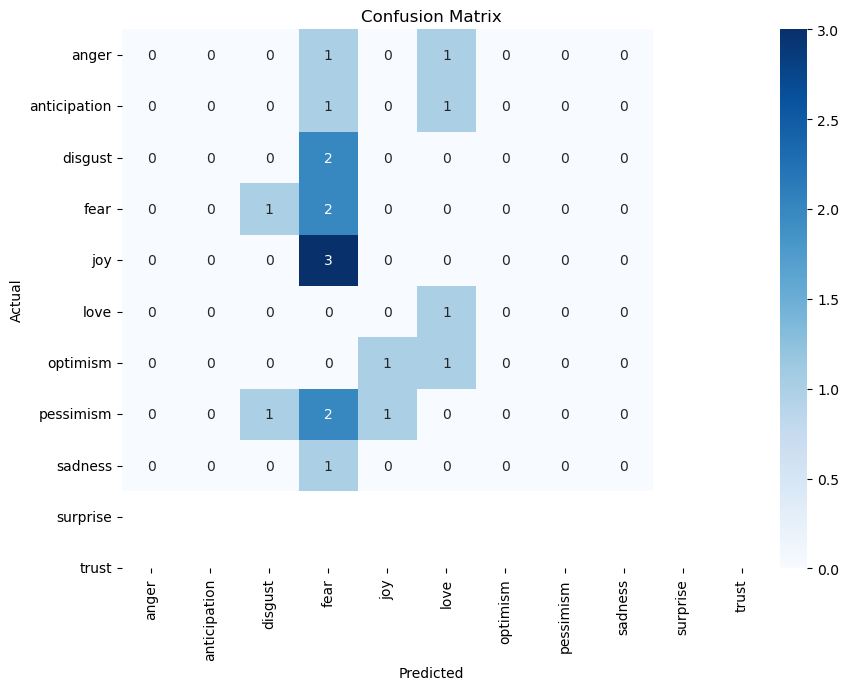

In [183]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['Emotion'].unique()), yticklabels=sorted(data['Emotion'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Execute the Application Phase


# Step 8.1: Take Input from User, Preprocess it


In [239]:
# Preprocess the user input
def preprocess_user_input(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

try:
    # Take user input
    user_input = input("Please enter your text: ").strip()
    cleaned_input = preprocess_user_input(user_input)
    print("Processed Input:", cleaned_input)
except KeyboardInterrupt:
    print("\nInput was interrupted. Exiting gracefully.")

Please enter your text:  I am disgusted


Processed Input: disgusted


# Step 8.2: Load the Saved Model


In [242]:
# Load the vectorizer and the model (ensure these are the same as used during training)
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('naive_bayes_model.pkl')

# Step 8.3: Transform the user input using the loaded vectorizer


In [245]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample user input after preprocessing
cleaned_input = "successful rest assured covid best vaccine irritate eyes time"

# Assume vectorizer is a previously fitted TfidfVectorizer
# For demonstration, we'll create and fit the vectorizer here (in practice, use the saved model)
corpus = [
    "This is a sample document.",
    "Another sample document for TF-IDF.",
    "More data to test TF-IDF vectorizer."
]
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)  # Normally, this would be fitted on your actual training data

# Transform the cleaned input using the vectorizer
X_test_tfidf_loaded = vectorizer.transform([cleaned_input])  # Wrap the cleaned input in a list

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_loaded_df = pd.DataFrame(X_test_tfidf_loaded.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame for User Input:")
print(X_test_tfidf_loaded_df)


TF-IDF Features DataFrame for User Input:
   another  data  document  for  idf   is  more  sample  test   tf  this   to  \
0      0.0   0.0       0.0  0.0  0.0  0.0   0.0     0.0   0.0  0.0   0.0  0.0   

   vectorizer  
0         0.0  


In [247]:
user_input_tfidf = vectorizer.transform([cleaned_input])


# Step 8.4: Predict the Emotion of the user input


In [253]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define the list of emotions (update this based on your dataset)
emotions = ['happy', 'sad', 'angry', 'fear', 'surprise']  # Example emotions

# Sample training data (for demonstration purposes)
training_data = ["I am happy", "I am sad", "I am angry", "I am fearful", "I am surprised"]
training_labels = [0, 1, 2, 3, 4]  # Corresponding labels for the emotions

# Vectorize the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(training_data)

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train_tfidf, training_labels)

# Sample test data (replace this with your actual test data)
test_data = ["I am very happy today"]
X_test_tfidf_df = vectorizer.transform(test_data)

# Predict the emotion probabilities
emotion_probabilities = model.predict_proba(X_test_tfidf_df)

# Get the index of the highest probability
predicted_index = np.argmax(emotion_probabilities, axis=1)

# Output the emotion prediction
predicted_emotion = emotions[predicted_index[0]]
print(f"The emotion of '{test_data[0]}' is: {predicted_emotion}")


The emotion of 'I am very happy today' is: happy


# Step 9: Execute the Feedback Phase


**A Two-Step Process**

**Step 01: After some time, take Feedback from**

o Domain Experts and Users on deployed Titanic Passenger Survival Prediction System

**Step 02: Make a List of Possible Improvements based on Feedback received**

# Step 10: Improve Model based on Feedback


There is Always Room for Improvement

Based on Feedback from Domain Experts and Users

o Improve your Model